In [2]:
import torch
import numpy as np
from torchvision import datasets,transforms
import torch.nn.functional as F
from torch import nn
from torch import optim

In [6]:
classes=['cardboard','fabrics','plastic','poly','wet']

In [7]:

#data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(128),
                                transforms.CenterCrop(128),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('C:/Users/Shahnawaz/Desktop/train/', transform=transform)


In [8]:
dataset.class_to_idx

{'cardboard': 0, 'fabrics': 1, 'plastic': 2, 'poly': 3, 'wet': 4}

In [9]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 128x128x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 5, padding=2)
        self.bn1=nn.BatchNorm2d(16)
        # convolutional layer (sees 64x64x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn2=nn.BatchNorm2d(32)
        # convolutional layer (sees 32x32x32 tensor)
        self.conv3 = nn.Conv2d(32, 48, 3, padding=1)
                                #sees 16*16*48
        self.bn3=nn.BatchNorm2d(48)
        self.conv4 = nn.Conv2d(48, 24, 3, padding=1)
                                #sees 8*8*24
        self.bn4=nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(24, 12, 8, padding=0)
        
        #output 1*1*6
        
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(12,8)
        self.fc2=nn.Linear(8,5)
        self.drop=nn.Dropout(p=0.30)
        

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x=self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x=self.bn2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x=self.bn3(x)
        x = self.pool(F.relu(self.conv4(x)))
        x=self.bn4(x)
        x = self.conv5(x)
        #print(x.shape)
        x = x.view(-1,1*1*12)
        x = self.drop(self.fc1(x))
        x=self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x


In [4]:
model=Net()
optimizer=optim.Adam(model.parameters(),lr=0.003)
criterion=nn.NLLLoss()

In [12]:
transform = transforms.Compose([transforms.Resize(128),
                                transforms.CenterCrop(128),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('C:/Users/Shahnawaz/Desktop/testing/', transform=transform)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)


In [5]:
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(48, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(24, 12, kernel_size=(8, 8), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=5, bias=True)
  (drop): Dropout(p=0.3)
)

In [6]:
#import torch
state=torch.load('copy2.pt')
model.load_state_dict(state)

In [27]:
trainlist=[]
validlist=[]
epochlist=[]


In [29]:
valid_loss_min =np.Inf

0.848555749793751

In [35]:
# number of epochs to train the model

n_epochs = 40 

 # track change in validation loss

for epoch in range(36, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss=0.0
    
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in dataloader:
        
            
        
        
        #print(data.shape)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        #target = target -1
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
        
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        #if train_on_gpu:
            #data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(dataloader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    trainlist.append(train_loss)
    validlist.append(valid_loss)
    epochlist.append(epoch)
    #valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} '.format(
        epoch, train_loss))
    print('Epoch: {} \tvalidation Loss: {:.6f} '.format(
        epoch, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'copy2.pt')
        valid_loss_min = valid_loss

Epoch: 36 	Training Loss: 0.127022 
Epoch: 36 	validation Loss: 0.136020 
Epoch: 37 	Training Loss: 0.088250 
Epoch: 37 	validation Loss: 0.508232 
Epoch: 38 	Training Loss: 0.096229 
Epoch: 38 	validation Loss: 0.072675 
Validation loss decreased (0.120343 --> 0.072675).  Saving model ...
Epoch: 39 	Training Loss: 0.095682 
Epoch: 39 	validation Loss: 0.054935 
Validation loss decreased (0.072675 --> 0.054935).  Saving model ...
Epoch: 40 	Training Loss: 0.077435 
Epoch: 40 	validation Loss: 0.054591 
Validation loss decreased (0.054935 --> 0.054591).  Saving model ...


In [27]:
c2vfile = open("c2vfile","a");
c2vfile.write(str(validlist))
c2tfile = open("c2tfile","a");
c2tfile.write(str(trainlist))
c2efile = open("c2efile","a");
c2efile.write(str(epochlist))

60

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochlist,trainlist,'r',label='train_error')
plt.plot(epochlist,validlist,'b',label='validation_error')
plt.legend(loc='best')
ax=plt.gca()
ax.set_ylim([0,3])
ax.set_xlim([0,1600])
plt.show()

In [75]:
target

tensor([3, 2, 4, 2, 4, 3])

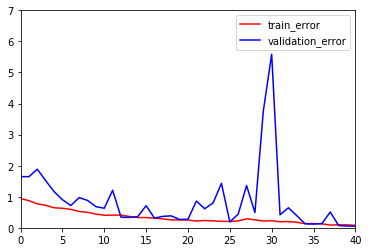

In [38]:
import matplotlib.pyplot as plt
plt.plot(epochlist,trainlist,'r',label='train_error')
plt.plot(epochlist,validlist,'b',label='validation_error')
plt.legend(loc='best')
ax=plt.gca()
ax.set_ylim([0,7])
ax.set_xlim([0,40])
plt.show()

In [41]:
transform = transforms.Compose([transforms.Resize(128),
                                transforms.CenterCrop(128),
                                transforms.RandomHorizontalFlip(p=0.0),                                
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('C:/Users/Shahnawaz/Desktop/realtest/', transform=transform)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=50, shuffle=False)
model.eval()
for data,target in test_loader:
    output = model(data)
    #break;
output=torch.exp(output)
print(output.shape)
_,output=torch.max(output,dim=1)
print(dataset.class_to_idx)
print("ground truth is ",target)
print("prediction is   ",output)

print(target==output)
#print(float(torch.sum(target==output).type('torch.FloatTensor')/2.0))
print("accuracy= ",float(torch.sum(target==output).type('torch.FloatTensor')/len(target==output))*100)


torch.Size([47, 5])
{'cardboard': 0, 'fabrics': 1, 'plastic': 2, 'poly': 3, 'wet': 4}
ground truth is  tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
prediction is    tensor([0, 0, 0, 3, 2, 2, 1, 4, 0, 1, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 4, 2, 0, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2])
tensor([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       dtype=torch.uint8)
accuracy=  61.702126264572144


In [47]:
transform = transforms.Compose([transforms.Resize(144),
                                transforms.CenterCrop(144),
                                transforms.RandomHorizontalFlip(p=0.0),                                
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('C:/Users/Shahnawaz/Desktop/real/', transform=transform)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=50, shuffle=False)
model.eval()
for data,target in test_loader:
    output = model(data)
    #break;
output=torch.exp(output)
print(output.shape)
print("raw output is ",torch.exp(output))
_,output=torch.max(output,dim=1)

print(dataset.class_to_idx)
print("ground truth is ",target)
print("prediction is   ",output)

#print(target==output)
#print(float(torch.sum(target==output).type('torch.FloatTensor')/2.0))
print("accuracy= ",float(torch.sum(target==output).type('torch.FloatTensor')/len(target==output))*100)


torch.Size([4, 5])
raw output is  tensor([[2.2429, 1.1435, 1.0256, 1.0180, 1.0152],
        [1.1876, 1.4967, 1.0958, 1.1102, 1.2569],
        [1.4740, 1.0222, 1.4862, 1.0459, 1.1606],
        [1.0241, 1.8155, 1.0051, 1.3173, 1.1043]], grad_fn=<ExpBackward>)
{'cardboard': 0, 'fabrics': 1, 'plastic': 2, 'poly': 3, 'wet': 4}
ground truth is  tensor([3])
prediction is    tensor([0, 1, 2, 1])
accuracy=  0.0


In [18]:
model.eval()
transform = transforms.Compose([#transforms.Resize(144),#                                                    
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('C:/Users/Shahnawaz/Desktop/real1/', transform=transform)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
for data,target in test_loader:
    output = model(data)
    #break;
output=torch.exp(output)
print(output.shape)
print("raw output is ",torch.exp(output))
_,output=torch.max(output,dim=1)

print(dataset.class_to_idx)
print("ground truth is ",target)
print("prediction is   ",output)
#import cv2
#img=cv2.imread('C:/Users/Shahnawaz/Desktop/testing/poly/blak.png')

torch.Size([2378, 5])
raw output is  tensor([[1.0074, 1.0361, 1.0710, 2.4261, 1.0023],
        [1.0002, 1.0083, 1.4258, 1.8894, 1.0005],
        [2.7072, 1.0009, 1.0030, 1.0000, 1.0001],
        ...,
        [1.0023, 1.0104, 1.0040, 1.0531, 2.5388],
        [1.4321, 1.3667, 1.1654, 1.1861, 1.0047],
        [1.6410, 1.2296, 1.2612, 1.0606, 1.0071]], grad_fn=<ExpBackward>)
{'cardboard': 0, 'fabrics': 1, 'plastic': 2, 'poly': 3, 'wet': 4}
ground truth is  tensor([3])
prediction is    tensor([3, 3, 0,  ..., 4, 0, 0])


In [20]:
transform = transforms.Compose([                                                     
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('C:/Users/Shahnawaz/Desktop/real1/', transform=transform)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=50, shuffle=False)

In [152]:

import torch
print(img.shape)

(128, 128, 3)


In [157]:
tenser=torch.from_numpy(img)
tenser=tenser.unsqueeze(0)
#tenser=tenser.permute(0,3,1,2)


In [158]:
tenser = tenser.type('torch.FloatTensor')
output=model(tenser)
output=torch.exp(output)
_,output=torch.max(output,dim=1)
print(output)

RuntimeError: Given groups=1, weight of size [16, 3, 5, 5], expected input[1, 128, 128, 3] to have 3 channels, but got 128 channels instead

In [155]:
print(output)

tensor([[0., 0., 1., 0., 0.]], grad_fn=<ExpBackward>)
